# Results visualization

## NDCG graph

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
results_groups_df = pd.read_csv('outputs/tables/test_wandb_metrics_for_graph.csv')

In [4]:
results_groups_df

,Name,Notes,train_params,model_name,Tags,ndcg@1 (Max),ndcg@2 (Max),ndcg@3 (Max),ndcg@4 (Max),ndcg@5 (Max),ndcg@6 (Max),ndcg@7 (Max),ndcg@8 (Max),ndcg@9 (Max),ndcg@10 (Max),hit_rate@1 (Max),mae (Min)
0,likely-resonance-142,-,SOBertLarge cross-encoder point-wise,SOBertLarge,cross-encoder,0.537,0.634,0.710,0.762,0.783,0.793,0.797,0.799,0.801,0.801,0.423,2.209
1,daily-bush-139,-,SOBertLarge cross-encoder pair-wise,SOBertLarge,"cross-encoder, ranking",0.540,0.639,0.710,0.762,0.786,0.795,0.799,0.801,0.802,0.803,0.427,na
2,graceful-fog-137,-,SOBertBase bi-encoder pair-wise,SOBertBase,"bi-encoder, ranking",0.534,0.638,0.712,0.764,0.784,0.795,0.798,0.800,0.801,0.802,0.416,na
3,grievous-jawa-109,-,SOBertBase embeddings pair-wise,SOBertBase,"embeddings, ranking",0.512,0.609,0.687,0.749,0.770,0.781,0.785,0.787,0.789,0.790,0.394,na
4,hokey-wars-106,-,TF-IDF pair-wise,NaN,"baseline, ranking, tfidf",0.465,0.573,0.655,0.721,0.746,0.757,0.762,0.765,0.767,0.768,0.340,na
5,comfy-sky-43,-,SOBertBase bi-encoder point-wise,SOBertBase,bi-encoder,0.527,0.625,0.702,0.757,0.778,0.787,0.792,0.794,0.795,0.796,0.409,2.212
6,stellar-meadow-25,"sobertbase, logreg","SOBertBase embeddings, regression",SOBertBase,"embeddings, regression",0.488,0.588,0.673,0.739,0.761,0.770,0.775,0.778,0.779,0.780,0.365,3.034
7,vague-glade-11,"logreg, max_features=10000, no question text",TF-IDF point-wise,NaN,"baseline, tfidf",0.426,0.522,0.613,0.685,0.717,0.729,0.735,0.738,0.741,0.743,0.298,4.187
8,dalip-mv_feat_mv-baseline,-,MVIEW+F0,NaN,"baseline, dalip",0.520,0.601,0.676,0.742,0.769,0.780,0.786,0.788,0.789,0.790,0.394,20.082
9,dalip-mv-baseline,-,MVIEW,NaN,"baseline, dalip",0.614,0.709,0.774,0.814,0.832,0.837,0.840,0.842,0.842,0.843,0.510,17.685


In [5]:
graph_data_df = []

for n, row in results_groups_df.iterrows():
    for col in row.index:
        if col.startswith('ndcg'):
            graph_data_df.append({
                'model': row['train_params'],
                'k': col.split('@')[1].split()[0],
                'NDCG@k': row[col]
            })

graph_data_df = pd.DataFrame(graph_data_df)

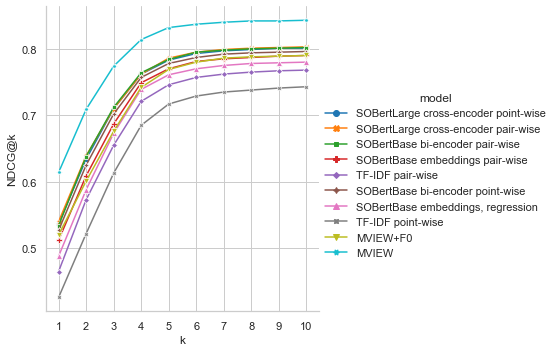

In [6]:
plot = sns.relplot(graph_data_df, x='k', y='NDCG@k', hue='model', style='model',
            kind='line', dashes=False, markers=True)
plot.savefig('outputs/images/groups_ndcg_graph.pdf')